<시계열 데이터 예측>

1. 시도표 그리기

In [30]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [31]:
#fbprophet 시계열 예측을 위한 라이브러리
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [32]:
df = pd.read_csv('corona.csv', encoding='CP949')

In [33]:
df.columns=['date','confirmed']
df

,date,confirmed
0,2020. 1. 27.,1
1,2020. 1. 28.,0
2,2020. 2. 4.,1
3,2020. 2. 5.,2
4,2020. 2. 7.,0
...,...,...
243,2020. 8. 31.,248
244,2020. 9. 1.,235
245,2020. 9. 2.,267
246,2020. 9. 3.,195


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Figure size 14400x14400 with 0 Axes>

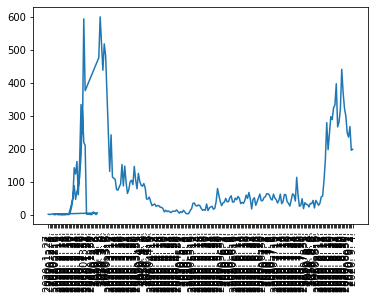

<Figure size 14400x14400 with 0 Axes>

In [34]:
# 데이터 전체(1/27-9/4)
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot('date','confirmed', data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Figure size 14400x14400 with 0 Axes>

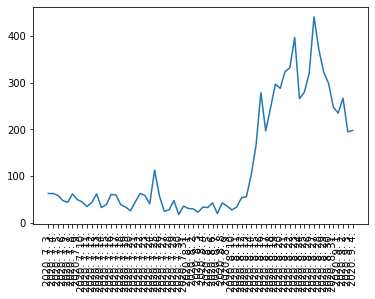

<Figure size 14400x14400 with 0 Axes>

In [35]:
# (7/1-9/4)
plt.plot(df.iloc[184:,0],df.iloc[184:,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Figure size 14400x14400 with 0 Axes>

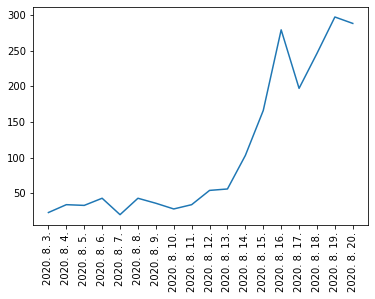

<Figure size 14400x14400 with 0 Axes>

In [36]:
# (8/3-8/20)
plt.plot(df.iloc[215:233,0],df.iloc[215:233,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

#Facebook Prophet 적용


In [37]:
# Facebook Prophet 예측 모델에 넣을 데이터프레임을 만들어준다.
#(날짜는 ds, 다른 변수는 y로 반드시 맞춰준다)
confirmed_prophet = df.rename(columns={'date': 'ds','confirmed': 'y'})
confirmed_prophet.head()

,ds,y
0,2020. 1. 27.,1
1,2020. 1. 28.,0
2,2020. 2. 4.,1
3,2020. 2. 5.,2
4,2020. 2. 7.,0


In [38]:
#Prophet 객체 생성하고 fit 해준다. 
m=Prophet() 
m.fit(confirmed_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#예측할 미래 dataframe 생성해준다. 30일간의 미래 예측해보기
future=m.make_future_dataframe(periods=30)
future
future.tail()
#9월 4일 기준이므로 10월 4일까지의 예측이 가능하다.

,ds
273,2020-09-30
274,2020-10-01
275,2020-10-02
276,2020-10-03
277,2020-10-04


In [40]:
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
273,2020-09-30,196.640781,64.081769,331.152248,193.133988,199.991349,0.791997,0.791997,0.791997,0.791997,0.791997,0.791997,0.0,0.0,0.0,197.432778
274,2020-10-01,197.965905,56.672964,335.421871,194.235351,201.575030,1.701294,1.701294,1.701294,1.701294,1.701294,1.701294,0.0,0.0,0.0,199.667199
275,2020-10-02,199.291030,56.422847,339.048703,195.357670,203.157733,3.325491,3.325491,3.325491,3.325491,3.325491,3.325491,0.0,0.0,0.0,202.616520
276,2020-10-03,200.616154,82.187701,358.400824,196.427438,204.724182,18.164220,18.164220,18.164220,18.164220,18.164220,18.164220,0.0,0.0,0.0,218.780374
277,2020-10-04,201.941278,78.629895,336.447115,197.536916,206.288401,2.564833,2.564833,2.564833,2.564833,2.564833,2.564833,0.0,0.0,0.0,204.506111


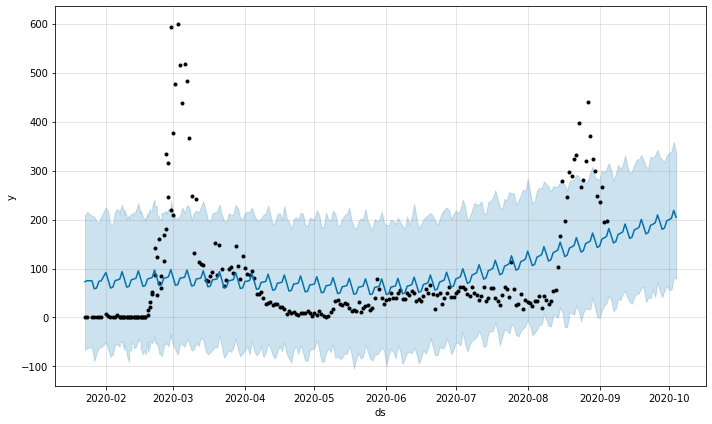

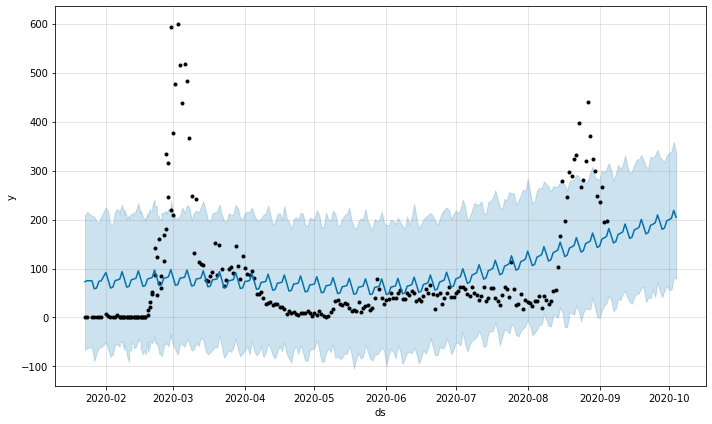

In [41]:
m.plot(forecast)

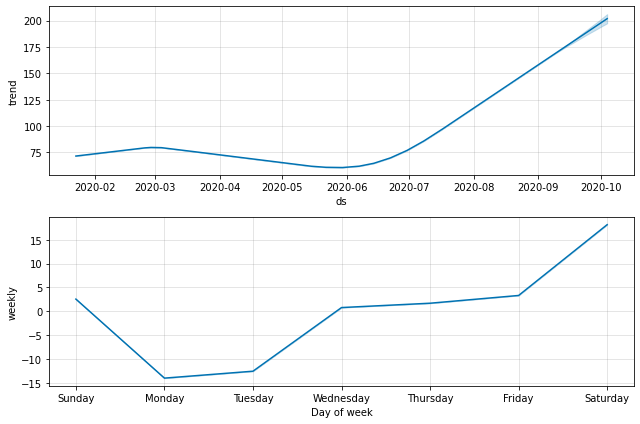

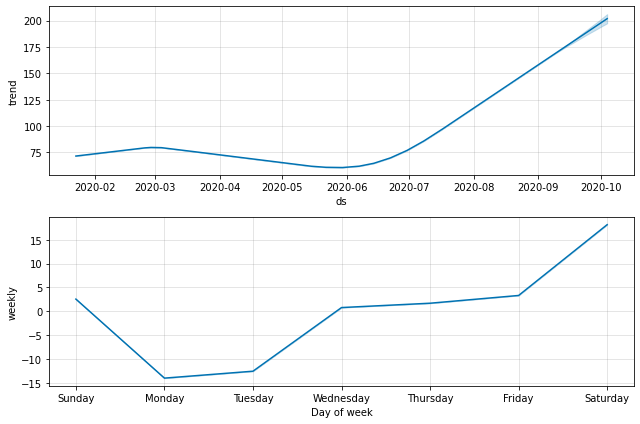

In [42]:
#forecast component를 시각화해준다(Trend, Weakly, Yearly)
m.plot_components(forecast)
#trend는 경향성을 보여주고 weekly는 한 주의 일별 경향을 보여준다.

In [43]:
  #Prophet에선 기본적으로 트렌드가 변경되는 지점을 자동으로 감지해 트렌드를 예측해준다.
m = Prophet(
    changepoint_prior_scale=0.2, #Change Point의 유연성을 조정하는 방법: 디폴트는 0.05(값이 커질수록 유연해진다)
    changepoint_range=0.9, # 기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정해주지만 90%로 설정해준다.
    
)

m.fit(confirmed_prophet)

#미래 dataframe
future = m.make_future_dataframe(periods=30)#현재까지의 날짜로부터 30일의 미래
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

#점이 없이 선만 있는 부분이 예측된 미래  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


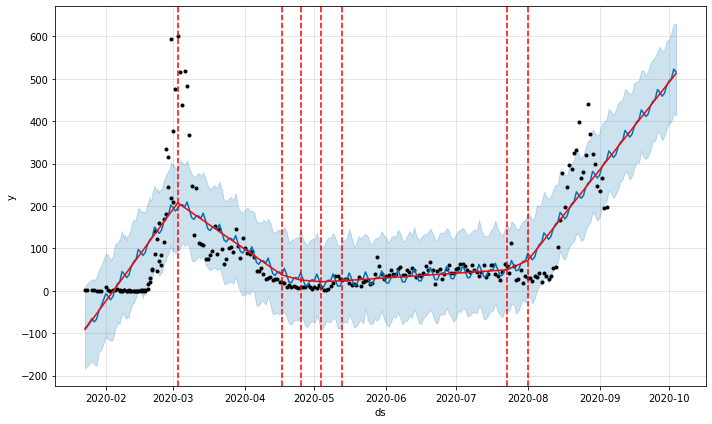

In [44]:
#checkpoints 나타내기
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#빨간 점선이 changepoints, 빨간 실선이 Trend를 나타낸다. 

#2. 사랑제일교회 집단 감염이 일어나지 않았을 시 예측


In [66]:
ifcon = df[['date','confirmed']][182:224]
ifcon.tail()

,date,confirmed
219,2020. 8. 7.,20
220,2020. 8. 8.,43
221,2020. 8. 9.,36
222,2020. 8. 10.,28
223,2020. 8. 11.,34


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Figure size 14400x14400 with 0 Axes>

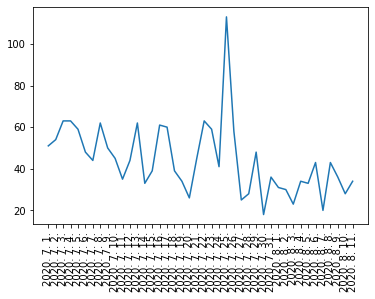

<Figure size 14400x14400 with 0 Axes>

In [67]:
#dataframe값들로 확진자 증감 시도표 그리기
# (7/1-8/11)
plt.plot(df.iloc[182:224,0],df.iloc[182:224,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

In [68]:
#fbprophet을 위한 dataframe
ifcon_prophet = ifcon.rename(columns={'date': 'ds','confirmed': 'y'})
ifcon_prophet.tail()

,ds,y
219,2020. 8. 7.,20
220,2020. 8. 8.,43
221,2020. 8. 9.,36
222,2020. 8. 10.,28
223,2020. 8. 11.,34


In [69]:
#Prophet 객체 생성하고 fit 해준다. 
m=Prophet()
m.fit(ifcon_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
#예측할 미래 dataframe 만들기(30일)
future=m.make_future_dataframe(periods=30)
future
future.tail()

,ds
67,2020-09-06
68,2020-09-07
69,2020-09-08
70,2020-09-09
71,2020-09-10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


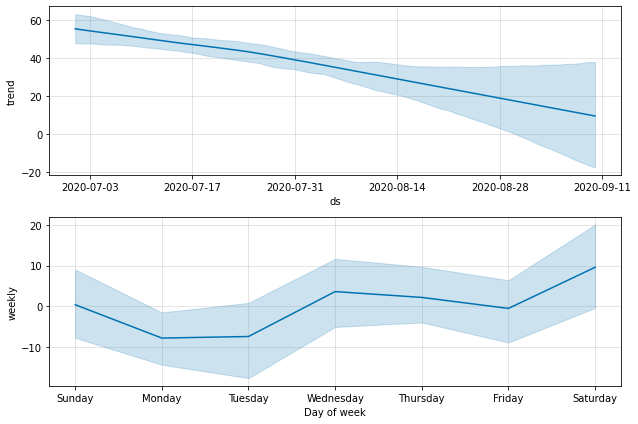

In [71]:
##교회 집단감염 전의 데이터는 수가 적고 일정한 형태로 나타나지 않기 떄문에 불확실성을 추가해준다.
#불확실성의 범위 보기
forecast = Prophet(interval_width=0.95).fit(ifcon_prophet).predict(future)
#시즈널리티의 불확실성을 알기 위해 베이지안 샘플링을 사용해야 함,mcmc.samples 파라미터를 사용. 이 값을 사용하면 최초 n일에 대해 적용한다는 뜻
m = Prophet(mcmc_samples=28)
forecast = m.fit(ifcon_prophet).predict(future)
fig = m.plot_components(forecast)
#불투명한 구간이 불확실한 오차구간

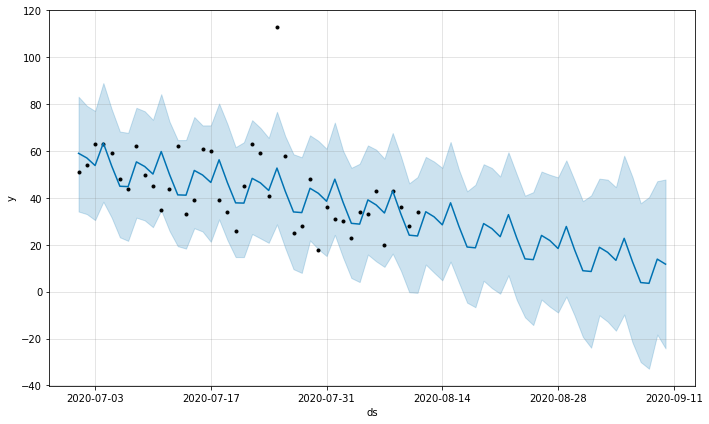

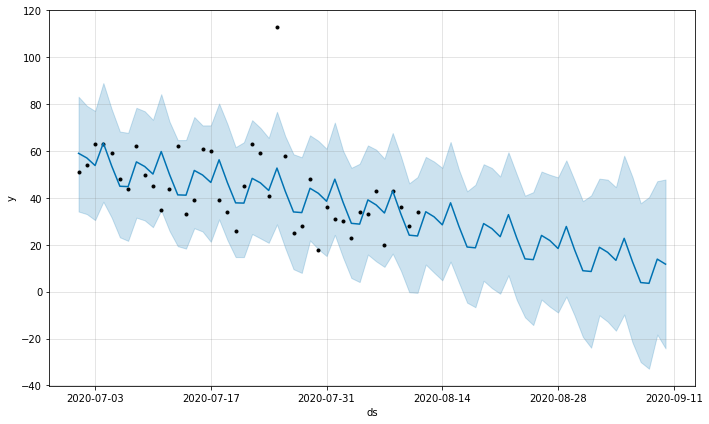

In [72]:
m.plot(forecast)

In [73]:
#예측모델 시각화
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible 디폴트는 0.05
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    
)

m.fit(ifcon_prophet)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


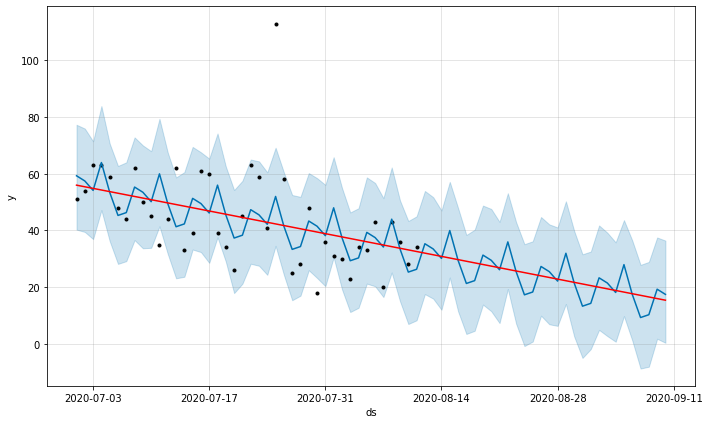

In [74]:
#checkpoints 나타내기
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#빨간 점선이 changepoints, 빨간 실선이 Trend를 나타낸다. 